In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
import keras
import tensorflow as tf
from keras.datasets.mnist import load_data

Using TensorFlow backend.


In [3]:
#Splitting training and testing dataset

In [4]:
(train_digits,train_labels),(test_digits,test_labels)= load_data(path='mnist.npz')

In [5]:
train_digits[0].shape # Each shape is 28 x28

(28, 28)

In [6]:
train_digits.shape

(60000, 28, 28)

In [7]:
test_digits.shape

(10000, 28, 28)

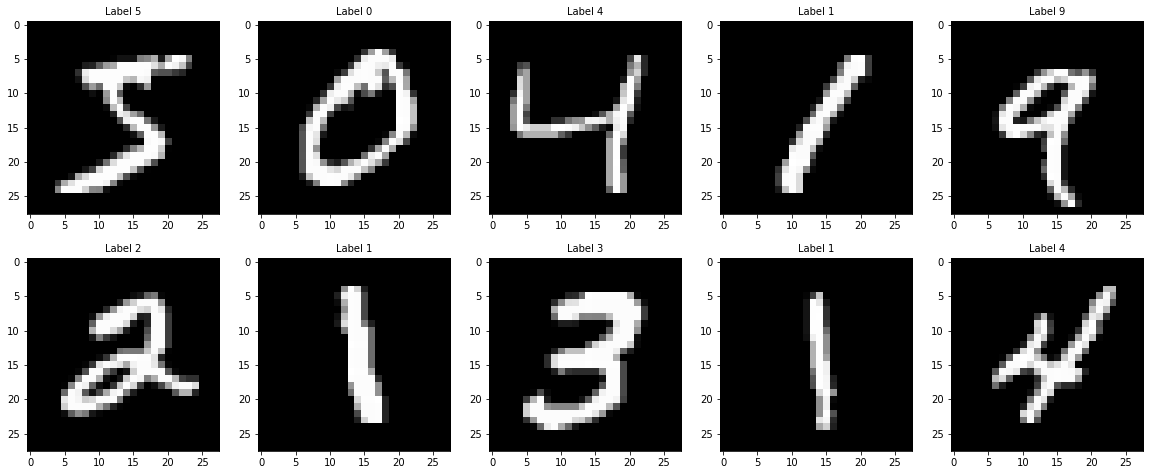

In [8]:
plt.figure(figsize=(20,8))
for index, (image,label) in enumerate(zip(train_digits[:10],train_labels[:10])):
    plt.subplot(2,5,index+1)
    plt.imshow(np.reshape(image,(28,28)), cmap='gray')
    plt.title("Label %i" %label, fontsize=10)

In [9]:
#Input shape of Image inorder to add rank, rank defines the type of image, rank =1 is gray scale, RGB image =3

In [10]:
image_height=train_digits.shape[1]
image_width=train_digits.shape[2]

# Gray scale image will have rank =1 Normal image has rank =3
num_channels=1
train_data=np.reshape(train_digits,(train_digits.shape[0],image_height,image_width,num_channels))


In [11]:
test_data=np.reshape(test_digits,(test_digits.shape[0],image_height,image_width,num_channels))

In [12]:
test_data.shape  #The rank is not added initally, that's we added rank here, so that we can feed CNN, the third parameter is rank

(10000, 28, 28, 1)

In [13]:
##Labels

In [14]:
train_labels.shape

(60000,)

In [15]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [16]:
## We require categorical form of the data because we are using multiclass classification : Use of one hot encoding

In [17]:
from keras.utils import to_categorical

In [18]:
num_classes=10
train_labels_cat=to_categorical(train_labels,num_classes=num_classes)
test_labels_cat=to_categorical(test_labels,num_classes=num_classes)

In [19]:
train_labels[0]

5

In [20]:
train_labels_cat[0] # The number is 5 here

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [21]:
test_labels[1]

2

In [22]:
test_labels_cat[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [23]:
# Image reshaping : Normalization
train_data=train_data.astype('float32')/255
test_data=test_data.astype('float32')/255


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train_data2,val_data,train_label2,val_label=train_test_split(train_data,train_labels_cat,test_size=0.1)

In [26]:
train_data2.shape

(54000, 28, 28, 1)

In [27]:
train_label2.shape

(54000, 10)

In [28]:
## CNN

In [29]:
from keras.models import Sequential

In [30]:
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [31]:
def build_model():
    model= Sequential()   # No. of filters  is number of convolved matrices =64
    #Layer :1                                                      #same means : 0 padding and other is valid
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same',input_shape=(image_height,image_width,num_channels)))
    # Maxpooling
    model.add(MaxPooling2D(pool_size=(2,2)))
    #Layer :2
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same',input_shape=(image_height,image_width,num_channels)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    #Layer :3
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same',input_shape=(image_height,image_width,num_channels)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    ## Flatten the matrix
    model.add(Flatten())
    
    #Dense Layer
    model.add(Dense(units=128,activation='relu'))
    #Output layer
    model.add(Dense(num_classes,activation='softmax'))
    
    # Optimizers and Loss functions     ##binary_crossentropy : 0,1 classes
    # -plogp -plog(1-p) where p is predicted obseration given by hypothesis function
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model 

In [32]:
model=build_model()
model.summary()  # CNN architecture  Finally 3X3 matrix is created of 64 layers

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

In [33]:
history=model.fit(train_data2,train_label2,epochs=10,batch_size=64,validation_data=(val_data,val_label)) 

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 59s 1ms/step - loss: 0.1750 - accuracy: 0.9452 - val_loss: 0.0503 - val_accuracy: 0.9833
Epoch 2/10
54000/54000 [==============================] - 59s 1ms/step - loss: 0.0478 - accuracy: 0.9850 - val_loss: 0.0278 - val_accuracy: 0.9908
Epoch 3/10
54000/54000 [==============================] - 59s 1ms/step - loss: 0.0328 - accuracy: 0.9896 - val_loss: 0.0276 - val_accuracy: 0.9913
Epoch 4/10
54000/54000 [==============================] - 59s 1ms/step - loss: 0.0263 - accuracy: 0.9917 - val_loss: 0.0291 - val_accuracy: 0.9905
Epoch 5/10
54000/54000 [==============================] - 59s 1ms/step - loss: 0.0208 - accuracy: 0.9936 - val_loss: 0.0238 - val_accuracy: 0.9918
Epoch 6/10
54000/54000 [==============================] - 58s 1ms/step - loss: 0.0167 - accuracy: 0.9946 - val_loss: 0.0270 - val_accuracy: 0.9922
Epoch 7/10
54000/54000 [==============================] - 58s 1ms/ste

In [34]:
histroy=pd.DataFrame(history.history)

In [35]:
histroy

,val_loss,val_accuracy,loss,accuracy
0,0.050264,0.983333,0.174999,0.945167
1,0.027759,0.990833,0.047807,0.984981
2,0.027600,0.991333,0.032767,0.989648
3,0.029150,0.990500,0.026284,0.991667
4,0.023788,0.991833,0.020819,0.993556
5,0.026981,0.992167,0.016732,0.994574
6,0.042870,0.987000,0.014568,0.995407
7,0.034051,0.991000,0.011971,0.995815
8,0.030347,0.991833,0.010627,0.996463
9,0.032744,0.991667,0.008864,0.997074


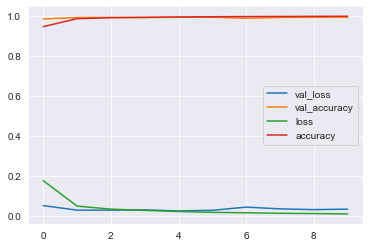

In [36]:
sns.set_style('darkgrid')
histroy.plot()

In [37]:
predictions=model.predict(test_data)


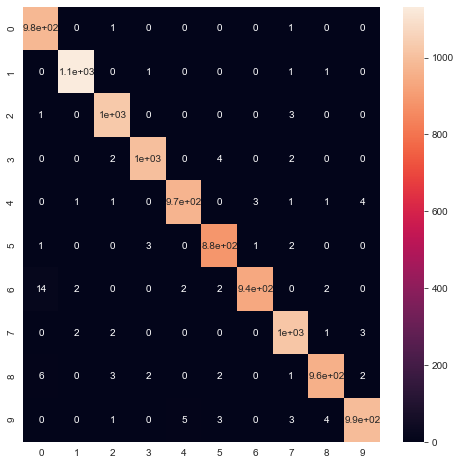

In [38]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(np.argmax(test_labels_cat,axis=1),np.argmax(predictions,axis=1)),annot=True)

In [39]:
import cv2

In [40]:
img=cv2.imread('C:/Users/anirudh/Pictures/Screenshots/3.png',0)

In [41]:
img=cv2.resize(img,(28,28))

In [42]:
img=cv2.bitwise_not(img) 

In [43]:
img_data=img.reshape(1,28,28,1)

In [44]:
test_data.shape

(10000, 28, 28, 1)

In [47]:
np.argmax(model.predict(img_data))

3

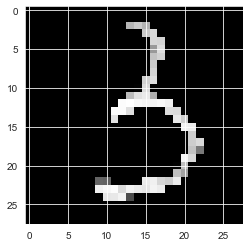

In [46]:
plt.imshow(np.reshape(img_data,(28,28)),cmap='gray')